<a href="https://colab.research.google.com/github/pepezamarripa/datascience_certificate/blob/main/DS_C3_SC1_Formato_JoseZamarripa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: José Antonio Zamarripa Díaz

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [2]:
# Carga del fichero happiness_report en el DataFrame happiness
happiness = pd.read_csv('happiness_report.csv')
print(happiness.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [3]:
# Creo el DataFrame happiness_mx
happiness_mx = happiness[happiness['Country or region'] == 'Mexico']
print(happiness_mx.head())

# Defino la columna 'Country or region' como el índice del nuevo DataFrame
happiness_mx.set_index('Country or region' , inplace = True)

    Overall rank Country or region  Score  GDP per capita  Social support  \
22            23            Mexico  6.595            1.07           1.323   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
22                    0.861                         0.433       0.074   

    Perceptions of corruption  
22                      0.073  


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

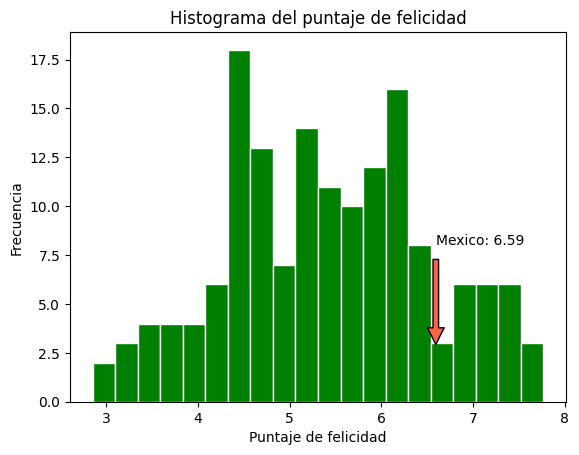

In [4]:
# Creo el histograma usando la columna score
plt.hist(happiness['Score'], bins = 20, color = 'green', edgecolor = 'white')
plt.title('Histograma del puntaje de felicidad')
plt.xlabel('Puntaje de felicidad')
plt.ylabel('Frecuencia')
plt.grid(False)

# Obtengo el puntaje de felicidad de México desde el DataFrame happiness_mx
score_mx = happiness_mx['Score'].values[0]

# Agrego la etiqueta para identificar el puntaje de México en el histograma
plt.annotate(f'Mexico: {score_mx:.2f}', xy=(score_mx, 2.5), xytext=(score_mx, 8), arrowprops=dict(facecolor='tomato', shrink=0.08))

# Muestro el histograma
plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

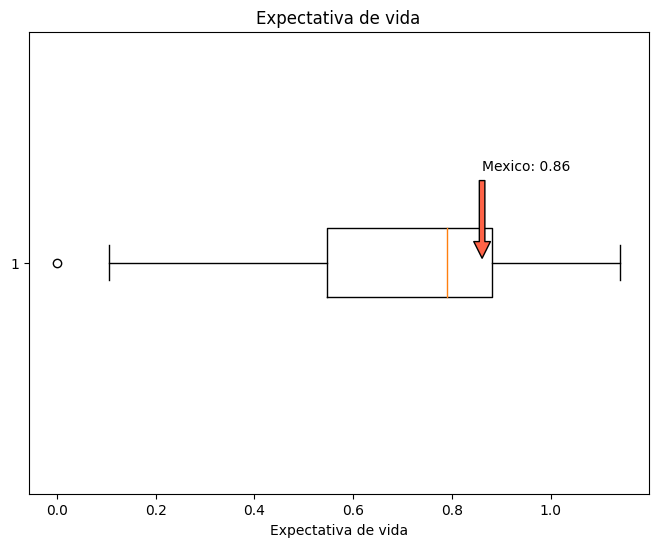

In [5]:
# Creo el boxplot usando la columna 'Healthy life expectancy'
plt.figure (figsize = (8,6))
plt.boxplot(happiness['Healthy life expectancy'], vert = False)
plt.title('Expectativa de vida')
plt.xlabel('Expectativa de vida')

#Obtengo la expectativa de vida de México
expectativa_mx = happiness_mx['Healthy life expectancy'].values[0]

#Agrego la etiqueta de México dentro del boxplot
plt.annotate(f'Mexico: {expectativa_mx:.2f}', xy=(expectativa_mx, 1), xytext=(expectativa_mx, 1.2), arrowprops=dict(facecolor='tomato', shrink=0.05))

# Muestro el boxplot
plt.show()

Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

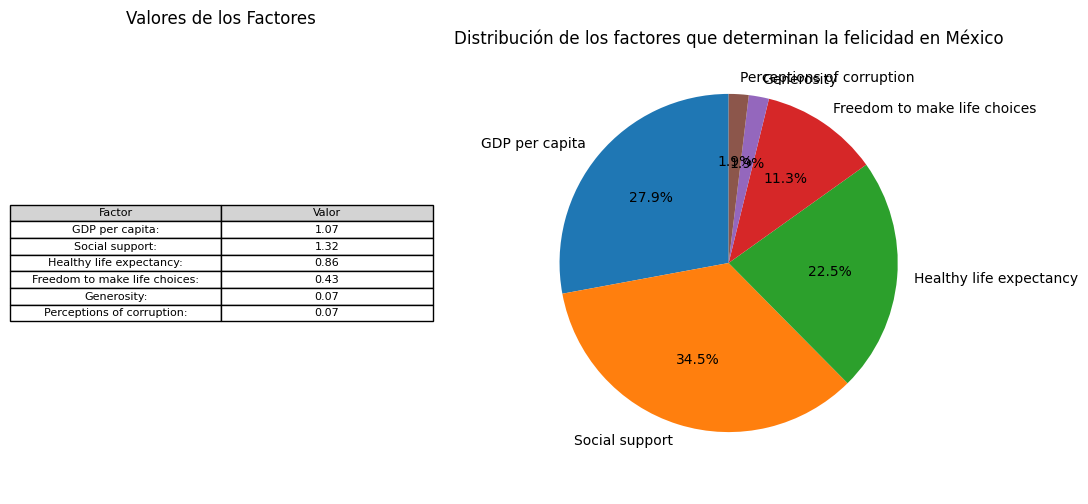

In [6]:
# Obtengo los factores que contribuyen a evaluar el score
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Obtengo los valores de los factores
valor_factores = happiness_mx[factores].values[0]

# Creo el espacio para el gráfico circular y una tabla que mostrará los valores
fig, ax = plt.subplots(1,2, figsize=(12,6))


# Creo el gráfico circular
ax[1].pie(valor_factores, labels=factores, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribución de los factores que determinan la felicidad en México')

# Creo la tabla de valores
tabla_valores = [[f'{etiqueta}:', f'{valor:.2f}'] for etiqueta, valor in zip(factores, valor_factores)]
ax[0].axis('off')
ax[0].table(cellText=tabla_valores, colLabels=['Factor', 'Valor'], cellLoc='center', loc='center', colColours=['lightgray', 'lightgray'])
ax[0].set_title('Valores de los Factores')

# Muestro el gráfico circular y la tabla
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<Figure size 1200x600 with 0 Axes>

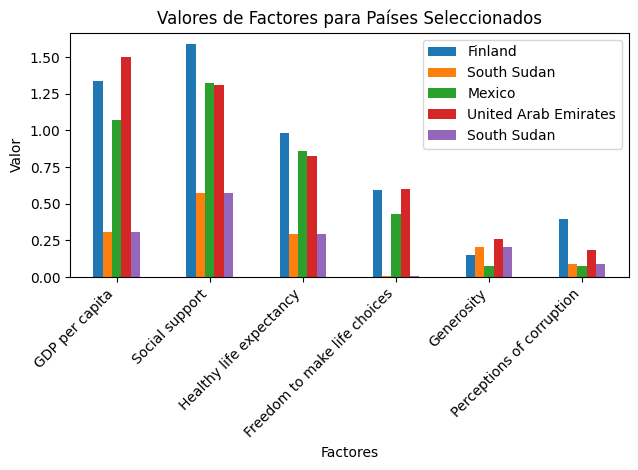

In [7]:
# Obtengo el país con el score mayor
max_score = happiness[happiness['Score'] == happiness['Score'].max()]

# Obtengo el país con el score menor
min_score = happiness[happiness['Score'] == happiness['Score'].min()]

# Obtengo los datos de Mexico
mexico = happiness[happiness['Country or region'] == 'Mexico']

# Selecciono dos países aleatorios que cambiarán cada vez que ejecute el código
random_countries = happiness.sample(n=2)

# Concateno los datos obtenidos de los países en un DataFrama
selected_countries = pd.concat([max_score, min_score, mexico , random_countries])

# Defino la columna 'Country or region' como el índice del nuevo DataFrame
selected_countries.set_index('Country or region' , inplace = True)

#Obtengo los valores para cada país
valores = selected_countries[factores]

# Creo un gráfico de barras para los factores y valores con nombres de países
plt.figure(figsize=(12, 6))
valores.T.plot(kind='bar')
plt.xlabel('Factores')
plt.ylabel('Valor')
plt.title('Valores de Factores para Países Seleccionados')
plt.xticks(range(len(factores)), factores, rotation=45, ha="right")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Muestro el gráfico de barras
plt.show()


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

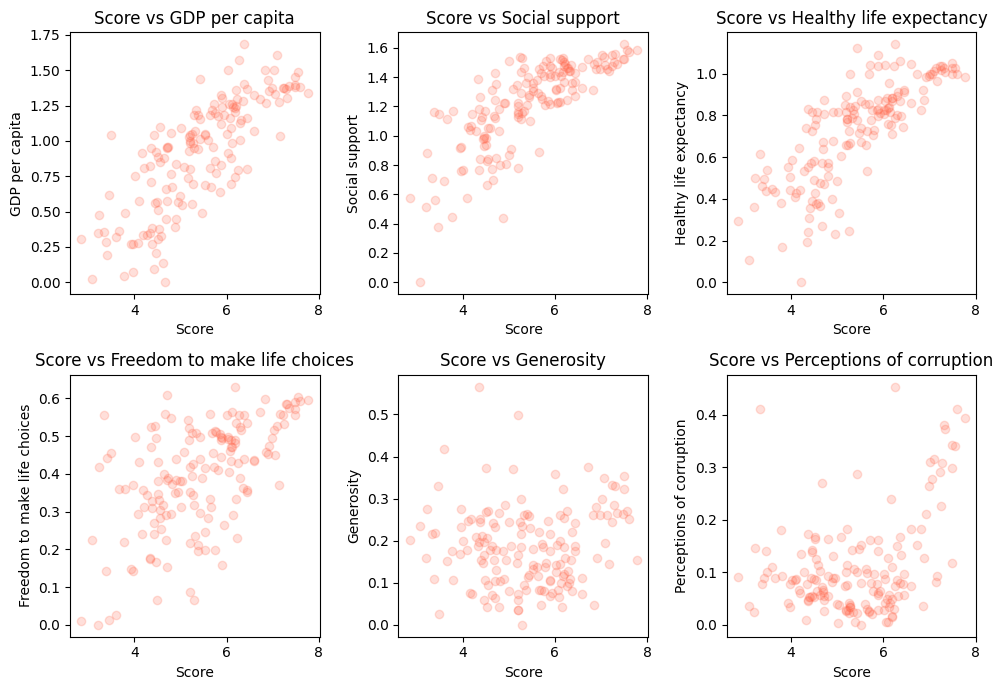

In [8]:
# Creo una copia del DataFrame happiness llamado selected_factors
selected_factors = happiness[factores].copy()

#Agrego la columna 'Score' al DataFrame selected_factors
selected_factors['Score'] = happiness['Score']

# Creo una matriz de gráficas de 2x3
plt.figure(figsize=(10, 7))

for i, factor in enumerate(factores):
  plt.subplot(2, 3, i+1)
  plt.scatter(selected_factors['Score'], selected_factors[factor],  alpha=0.2, color='tomato')
  plt.title(f'Score vs {factor}')
  plt.xlabel('Score')
  plt.ylabel(factor)

plt.tight_layout()

# Muestro los gráficos
plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

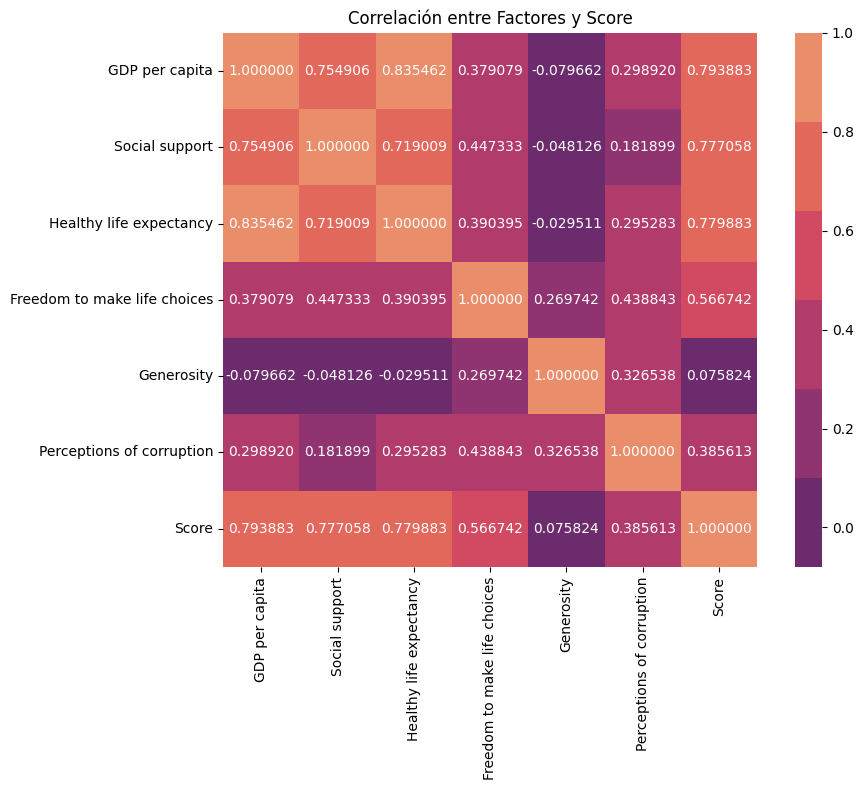

In [11]:
# Obtengo la matriz de correlación
correlation_matrix = selected_factors.corr()

# Defino la paleta de colores de la matriz de correlación
matrix_color = sns.color_palette("flare_r")

# Creo el mapa de calor con las correlaciones obtenidas en correlation_matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt="2f", cmap=matrix_color, square=True)
plt.title('Correlación entre Factores y Score')
plt.tight_layout()

# Muestro la matriz
plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

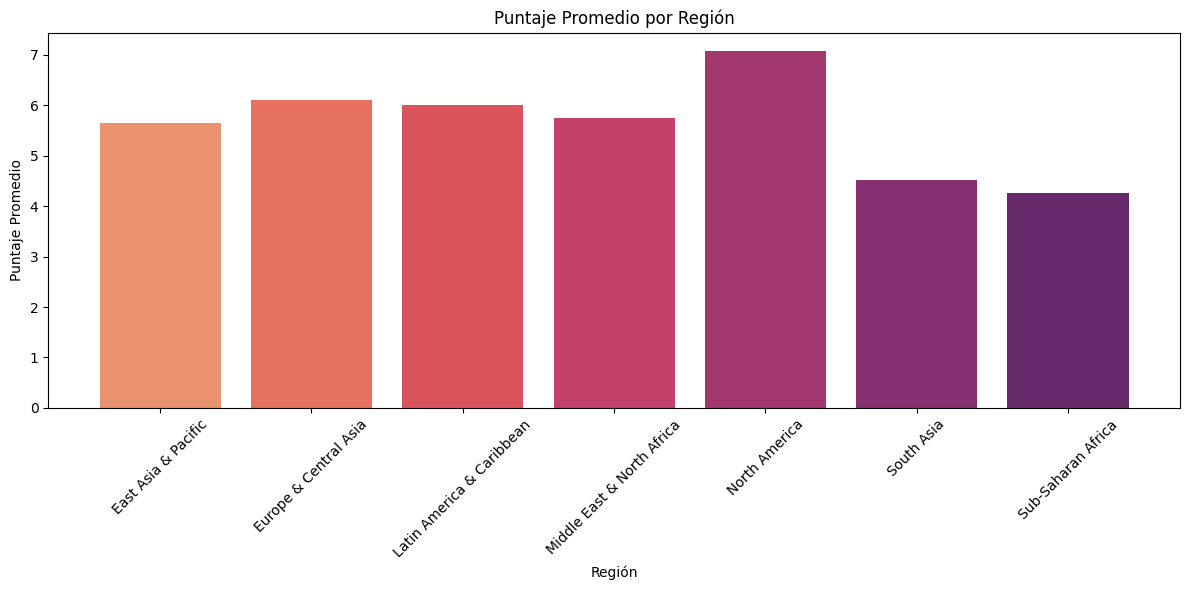

In [10]:
# Leo el fichero Metadata.csv y lo guardo en un DataFrame que lleva el mismo nombre
metadata = pd.read_csv('Metadata.csv')

#Hago un merge de ambos DataFrames, el nuevo DataFrame se llama metadata_happiness
metadata_happiness = happiness.merge(metadata, left_on='Country or region', right_on='TableName', how='inner')


# Agrupo por la columna 'Region' y calculo la media del 'Score'
score_por_region = metadata_happiness.groupby('Region')['Score'].mean().reset_index()

# Defino la paleta de colores del gráfico
colores = sns.color_palette("flare", len(score_por_region))

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(score_por_region['Region'], score_por_region['Score'], color=colores)
plt.xlabel('Región')
plt.ylabel('Puntaje Promedio')
plt.title('Puntaje Promedio por Región')
plt.xticks(rotation=45)
plt.tight_layout()

# Muestro el gráfico
plt.show()